In [79]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing as sk_preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import seaborn as sns

In [80]:
dataset = pd.read_csv('/Users/shekhara/Library/CloudStorage/OneDrive-beloit.edu/Desktop/insurance.csv')
#dataset.describe()

In [81]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [82]:
def categorise(row):  
    if row['charges'] > 0 and row['charges'] <= 5000:
        return 'Tier 0'
    elif row['charges'] > 5000 and row['charges'] <= 10000:
        return 'Tier 1'
    elif row['charges'] > 10000 and row['charges'] <= 15000:
        return 'Tier 2'
    return 'Tier 3'

In [83]:
dataset['class'] = dataset.apply(lambda row: categorise(row), axis=1)
#data["sex"] = data.apply(lambda row: sex_change(row), axis = 1)
dataset.head()


,age,sex,bmi,children,smoker,region,charges,class
0,19,female,27.900,0,yes,southwest,16884.92400,Tier 3
1,18,male,33.770,1,no,southeast,1725.55230,Tier 0
2,28,male,33.000,3,no,southeast,4449.46200,Tier 0
3,33,male,22.705,0,no,northwest,21984.47061,Tier 3
4,32,male,28.880,0,no,northwest,3866.85520,Tier 0


In [84]:
#def sex_change(row):
  #if row["sex"] == "male": 
    #return 1
  #return 0

In [85]:
new_dataset = dataset.copy()
#this is new dataset
new_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
new_dataset.drop('charges', axis=1, inplace=True)
#new_dataset.drop("sex", axis = 1, inplace = True)

In [87]:
new_dataset.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


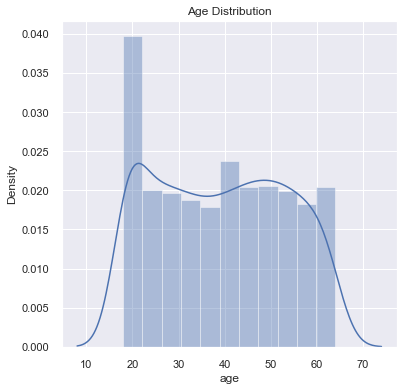

In [88]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(new_dataset['age'])
plt.title('Age Distribution')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


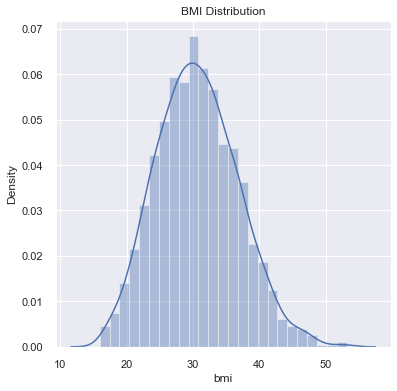

In [89]:
plt.figure(figsize=(6,6))
sns.distplot(new_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Text(0, 0.5, 'Number of records')

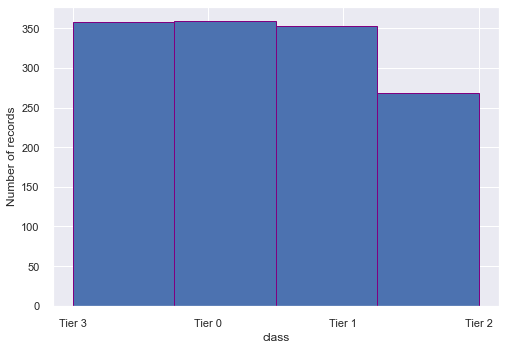

In [90]:
plt.hist(new_dataset["class"], bins = 4, edgecolor = "Purple")
plt.xlabel("class")
plt.ylabel("Number of records")

In [91]:
# encoding sex column
new_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
# encoding 'smoker' column
new_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
# encoding 'region' column
new_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


X = new_dataset.drop(columns='class', axis=1)
Y = new_dataset['class']
print(X)
print(Y)


#making data from string to numerical
new_dataset_features=new_dataset.drop('class',axis=1)
new_dataset_features=pd.get_dummies(new_dataset_features, drop_first=True)
new_dataset.describe()



      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       Tier 3
1       Tier 0
2       Tier 0
3       Tier 3
4       Tier 0
         ...  
1333    Tier 2
1334    Tier 0
1335    Tier 0
1336    Tier 0
1337    Tier 3
Name: class, Length: 1338, dtype: object


,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455904
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, stratify = Y)  

In [93]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 6)

In [94]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [95]:
1-clf.score(X_train, Y_train) # training error

0.09532710280373835

In [96]:
Ytrain_predictions = clf.predict(X_train)

In [97]:
cm_train = confusion_matrix(Ytrain_predictions, Y_train)

In [98]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [99]:
accuracy(cm_train) #training accuracy

0.9046728971962616

In [100]:
Y_predictions = clf.predict(X_test)

In [101]:
cm = confusion_matrix(Y_predictions, Y_test)

In [102]:
accuracy(cm) #testing

0.8507462686567164

In [103]:
1-accuracy(cm) #testing error

0.14925373134328357

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


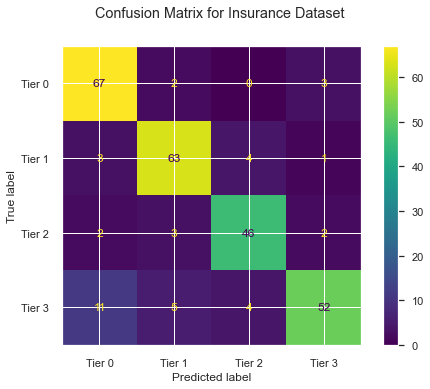

In [104]:
fig = plot_confusion_matrix(clf, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Insurance Dataset")
plt.show()

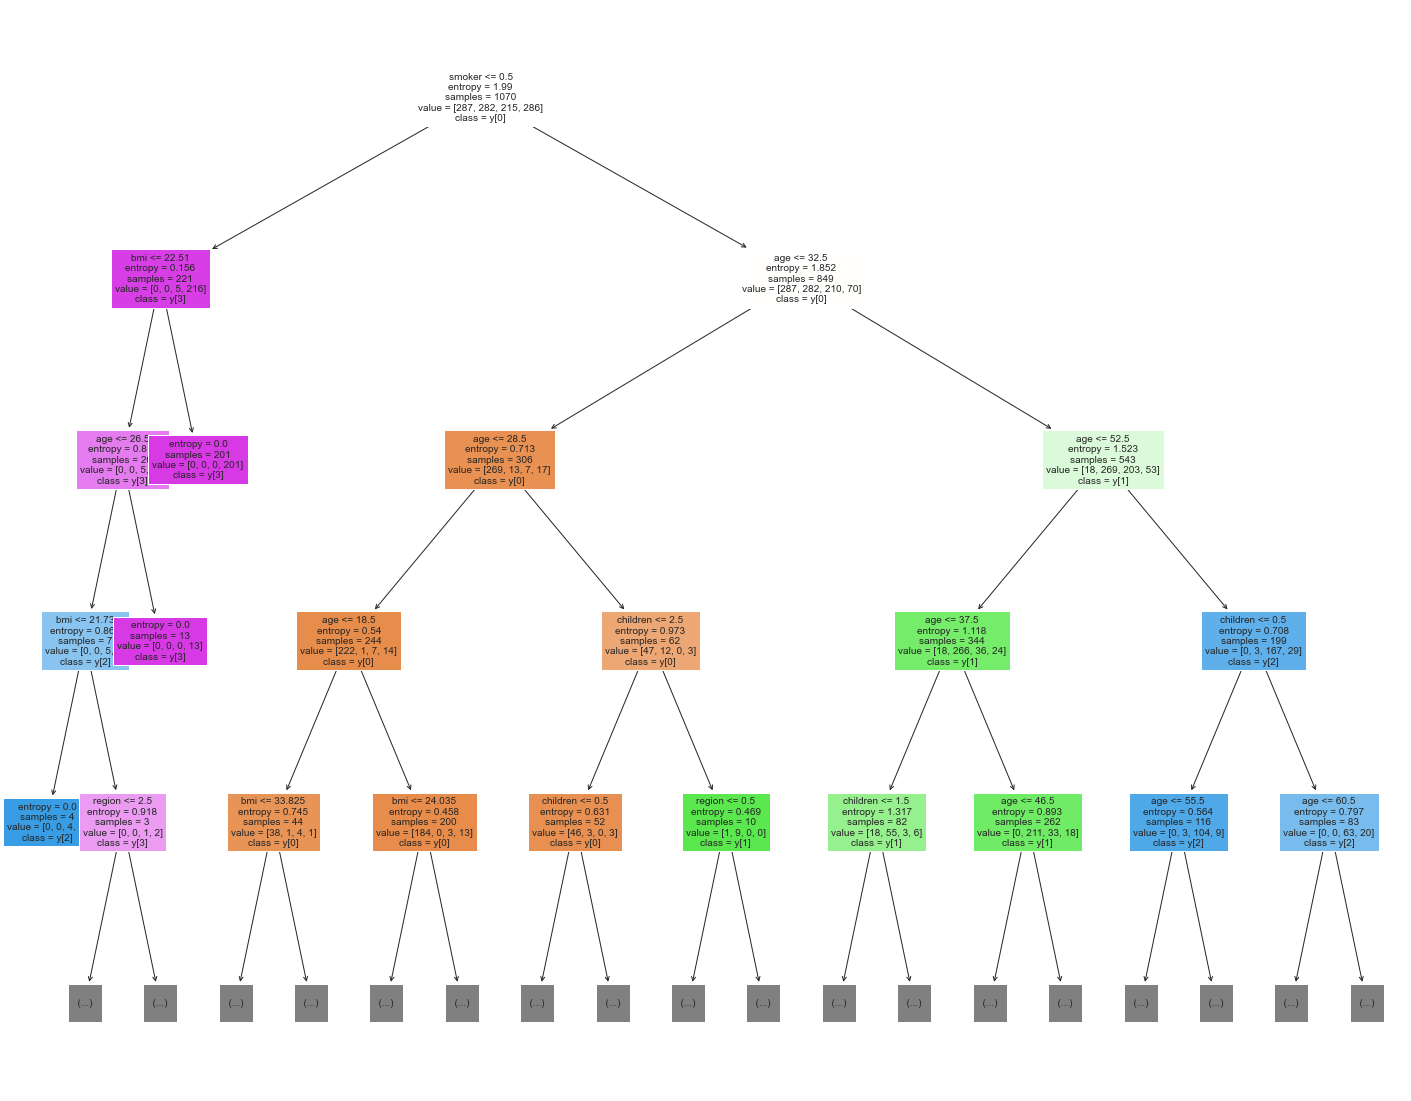

In [105]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= 4,feature_names = list(X.columns), class_names = True)
plt.show()

## Naive Bayes Classifier

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [108]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [109]:
nb = confusion_matrix(y_pred, Y_test)

In [110]:
nb_train = confusion_matrix(Ytrain_predictions, Y_train)

In [111]:
accuracy(nb_train) #training accuracy

0.9046728971962616

In [112]:
accuracy(nb)#testing accuracy

0.6902985074626866

              precision    recall  f1-score   support

      Tier 0       0.80      0.93      0.86        72
      Tier 1       0.51      0.94      0.66        71
      Tier 2       0.00      0.00      0.00        53
      Tier 3       0.96      0.71      0.82        72

    accuracy                           0.69       268
   macro avg       0.57      0.65      0.58       268
weighted avg       0.61      0.69      0.63       268



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/util

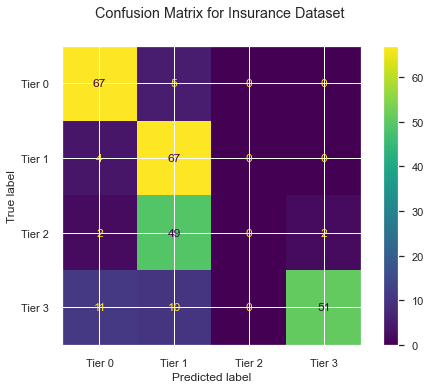

In [113]:
print(classification_report(Y_test, y_pred))
fig = plot_confusion_matrix(gnb, X_test, Y_test, display_labels=gnb.classes_)
fig.figure_.suptitle("Confusion Matrix for Insurance Dataset")

plt.show()

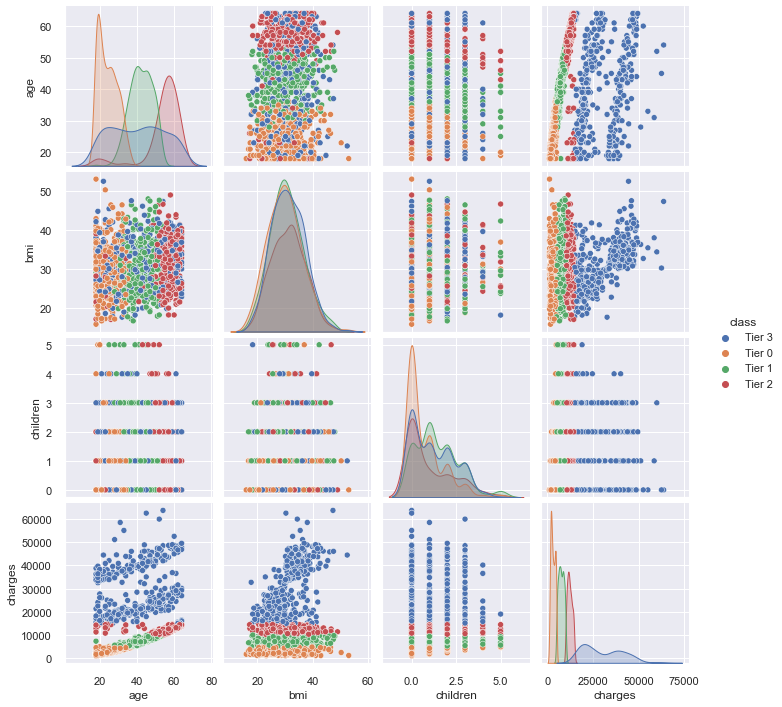

In [114]:
sns.pairplot(dataset, hue = "class")


In [115]:
new_dataset.head(10)

,age,sex,bmi,children,smoker,region,class
0,19,1,27.900,0,0,1,Tier 3
1,18,0,33.770,1,1,0,Tier 0
2,28,0,33.000,3,1,0,Tier 0
3,33,0,22.705,0,1,3,Tier 3
4,32,0,28.880,0,1,3,Tier 0
5,31,1,25.740,0,1,0,Tier 0
6,46,1,33.440,1,1,0,Tier 1
7,37,1,27.740,3,1,3,Tier 1
8,37,0,29.830,2,1,2,Tier 1
9,60,1,25.840,0,1,3,Tier 3


In [116]:
scaler = sk_preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
#Implementing SVM model
svc = SVC(probability=True)
svc.fit(X_train, Y_train.values.ravel())
Y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[68  4  0  0]
 [ 4 65  2  0]
 [ 2  4 45  2]
 [11  5  5 51]]
              precision    recall  f1-score   support

      Tier 0       0.80      0.94      0.87        72
      Tier 1       0.83      0.92      0.87        71
      Tier 2       0.87      0.85      0.86        53
      Tier 3       0.96      0.71      0.82        72

    accuracy                           0.85       268
   macro avg       0.87      0.85      0.85       268
weighted avg       0.87      0.85      0.85       268



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


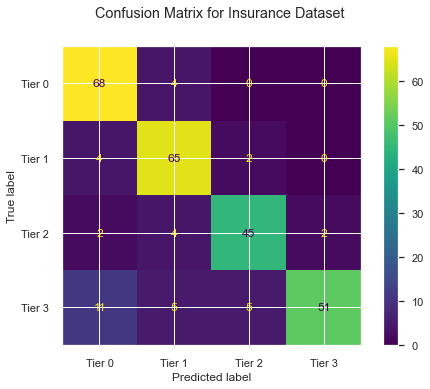

In [118]:
fig = plot_confusion_matrix(svc, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Insurance Dataset")
plt.show()

## Neural Networks

In [119]:
#ANN with 3 hidden layers layers with sizes 200,150 and 50 
nn=MLPClassifier(hidden_layer_sizes=(200), activation = 'logistic', solver = 'adam')

In [120]:
nn.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=200)

In [121]:
#predicted values
Y_predictions = nn.predict(X_test)

In [122]:
nn_train = confusion_matrix(Ytrain_predictions, Y_train)

In [123]:
accuracy(nn_train) #training accuracy 

0.9046728971962616

In [124]:
#confusion matrix
cm = confusion_matrix(Y_predictions, Y_test)

In [125]:
accuracy(cm)#testing accuracy

0.8432835820895522

In [126]:
1-accuracy(cm) #testing error

0.15671641791044777

In [127]:
print(classification_report(Y_test, Y_predictions))

              precision    recall  f1-score   support

      Tier 0       0.82      0.90      0.86        72
      Tier 1       0.82      0.87      0.84        71
      Tier 2       0.80      0.91      0.85        53
      Tier 3       0.96      0.71      0.82        72

    accuracy                           0.84       268
   macro avg       0.85      0.85      0.84       268
weighted avg       0.85      0.84      0.84       268



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


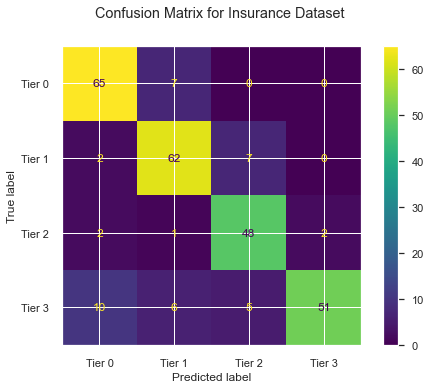

In [128]:
fig = plot_confusion_matrix(nn, X_test, Y_test)
fig.figure_.suptitle("Confusion Matrix for Insurance Dataset")
plt.show()

## Implementing K means

In [181]:
scaler = sk_preprocessing.StandardScaler()
data_cluster = scaler.fit_transform(new_dataset_features)
print(data_cluster)

[[-1.43876426  1.0105187  -0.45332    -0.90861367 -1.97058663 -0.40328924]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719  0.5074631  -1.28788104]
 [-0.79795355 -0.98959079  0.38330685  1.58092576  0.5074631  -1.28788104]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367  0.5074631  -1.28788104]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367  0.5074631  -0.40328924]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367 -1.97058663  1.36589436]]


In [182]:
kmeans = KMeans(n_clusters = 4, random_state = 0,init = 'k-means++')

In [183]:
data_cluster

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

In [184]:
kmeans.fit(data_cluster)

KMeans(n_clusters=4, random_state=0)

In [185]:
kmeans.labels_

array([3, 1, 1, ..., 1, 0, 3], dtype=int32)

In [186]:
## Applying PCA

In [187]:
#apply PCA as we have a lot of attributes and decreasing dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_cluster)

PCA(n_components=2)

In [188]:
kmeans_pca = pca.transform(data_cluster)

In [189]:
kmeans_pca

array([[-0.27694667,  1.65577926],
       [ 0.9330647 ,  1.05363039],
       [ 1.06278897,  0.47287394],
       ...,
       [ 0.91304921,  0.00862667],
       [-0.86311078,  0.11148898],
       [-0.61538915, -0.10288594]])

Text(0, 0.5, 'Second Principal Component')

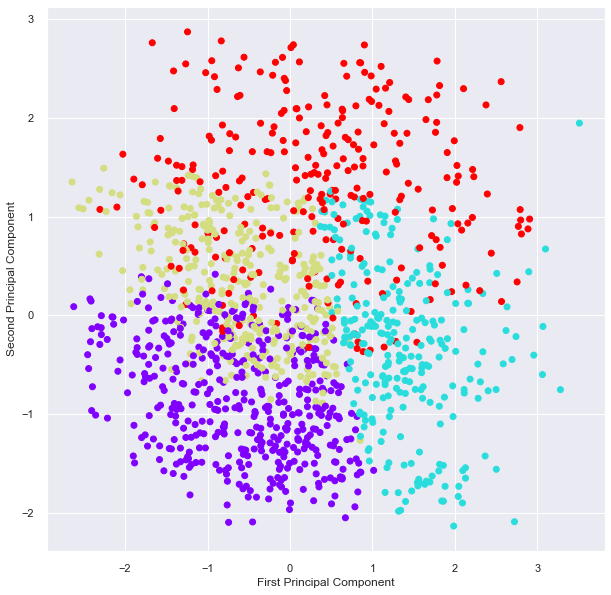

In [190]:
plt.figure(figsize = (10,10))
plt.scatter(kmeans_pca[:,0], kmeans_pca[:,1], c = kmeans.labels_, cmap = 'rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Building a classification system

In [200]:
input_data = (56,0,23.900,0,0,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = nn.predict(input_data_reshaped)
prediction2 = clf.predict(input_data_reshaped)
prediction3 = gnb.predict(input_data_reshaped)
prediction4 = svc.predict(input_data_reshaped)


print('The insurance Tier(ANN) ', prediction[0])
print('The insurance Tier(Decision Tree) ', prediction2[0])
print('The insurance Tier(Bayes) ', prediction3[0])
print('The insurance Tier(SVC) ', prediction4[0])

The insurance Tier(ANN)  Tier 2
The insurance Tier(Decision Tree)  Tier 3
The insurance Tier(Bayes)  Tier 3
The insurance Tier(SVC)  Tier 3


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### ROC curve

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


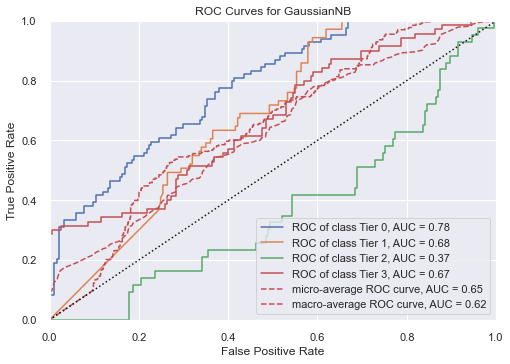

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


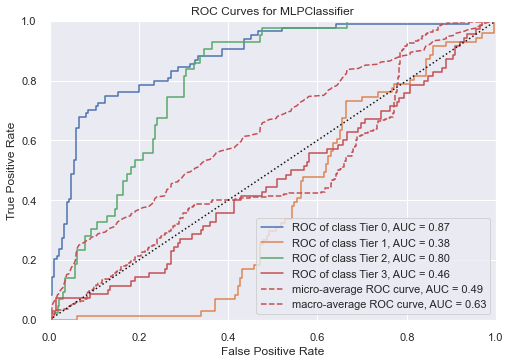

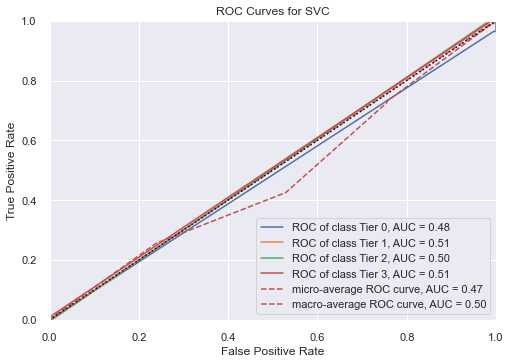

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from yellowbrick.classifier import ROCAUC

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
Y = LabelEncoder().fit_transform(Y)

# Instaniate the classification model and visualizer
visualizer = ROCAUC(gnb, classes = ["Tier 0","Tier 1","Tier 2","Tier 3"])
visualizer2 = ROCAUC(nn, classes = ["Tier 0","Tier 1","Tier 2","Tier 3"])
visualizer3 = ROCAUC(svc, classes = ["Tier 0","Tier 1","Tier 2","Tier 3"])
visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()
visualizer2.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer2.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer2.show()
visualizer3.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer3.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer3.show()